In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import SimpleITK as sitk

In [3]:
datafile_path = "/kaggle/input/lung-tumor-ds/dataset_lung.xlsx"
dataset = pd.read_excel(datafile_path)

In [4]:
print("Dataset Preview:")
print(dataset.head())

print("\nDataset Info:")
print(dataset.info())
print("\nMissing Values:")
print(dataset.isnull().sum())
print("\nDuplicated Entries:", dataset.duplicated().sum())

Dataset Preview:
            Full_slice            Nodule  TumorClass
0  pat1_fullslice.nrrd  pat1_nodule.nrrd           5
1  pat2_fullslice.nrrd  pat2_nodule.nrrd           5
2  pat3_fullslice.nrrd  pat3_nodule.nrrd           2
3  pat4_fullslice.nrrd  pat4_nodule.nrrd           5
4  pat5_fullslice.nrrd  pat5_nodule.nrrd           4

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Full_slice  2363 non-null   object
 1   Nodule      2363 non-null   object
 2   TumorClass  2363 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 55.5+ KB
None

Missing Values:
Full_slice    0
Nodule        0
TumorClass    0
dtype: int64

Duplicated Entries: 0



Class Distribution:
TumorClass
3    1092
2     457
4     418
1     244
5     152
Name: count, dtype: int64


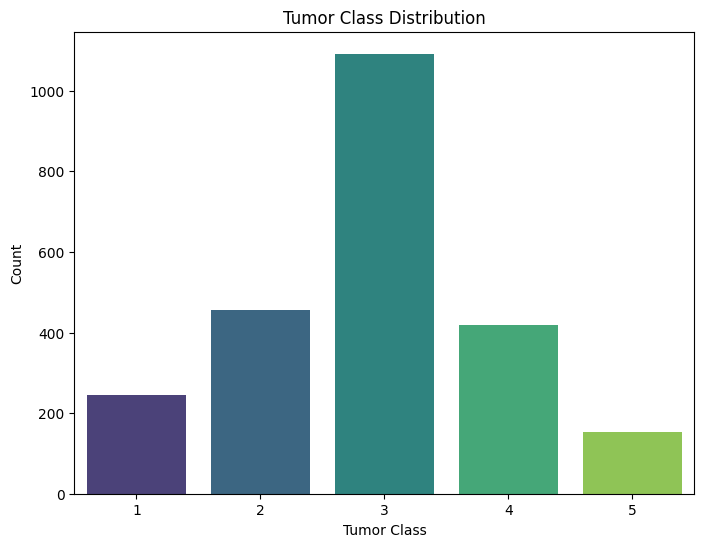

In [5]:
class_counts = dataset['TumorClass'].value_counts()
print("\nClass Distribution:")
print(class_counts)

plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.title("Tumor Class Distribution")
plt.xlabel("Tumor Class")
plt.ylabel("Count")
plt.show()

In [6]:
def load_nrrd(file_path):
    try:
        image = sitk.ReadImage(file_path)
        array = sitk.GetArrayFromImage(image)
        return array
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return None

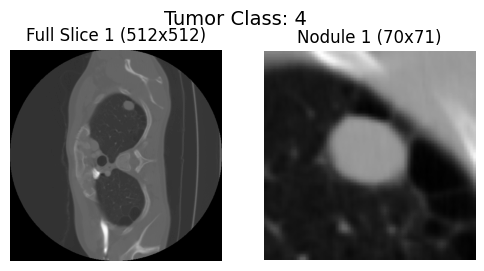

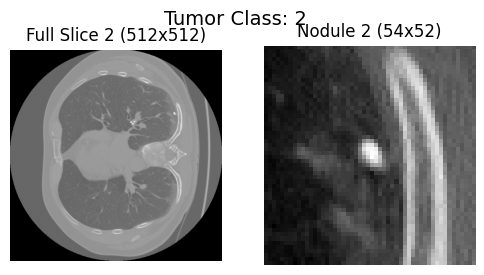

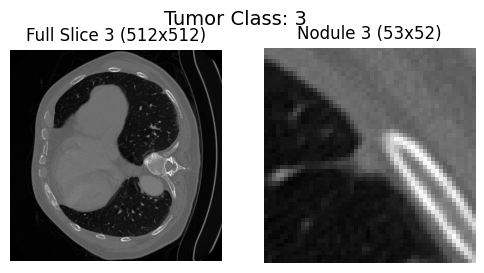

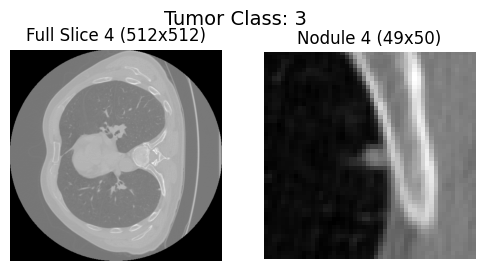

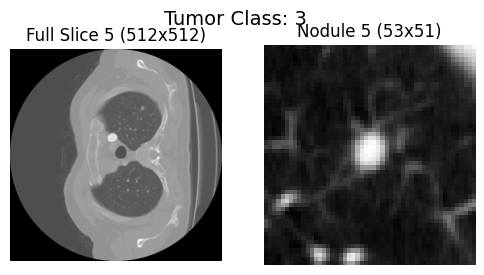

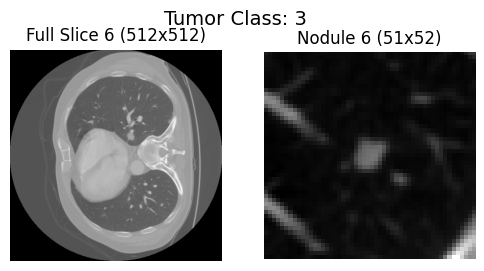

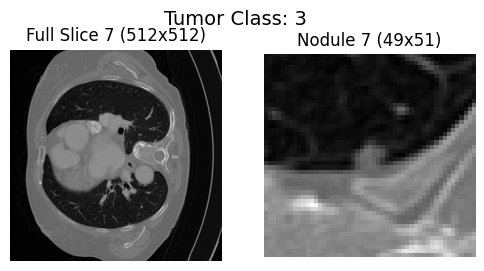

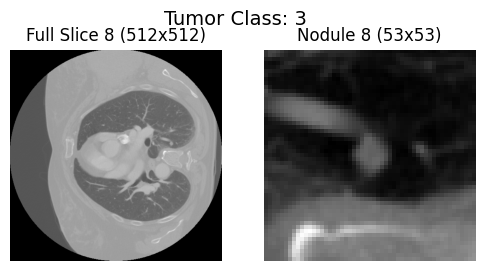

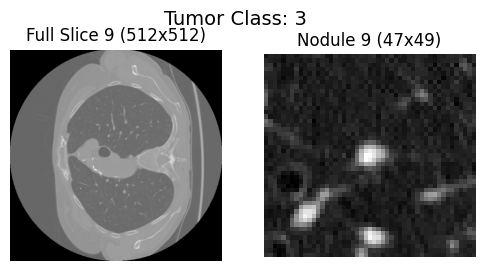

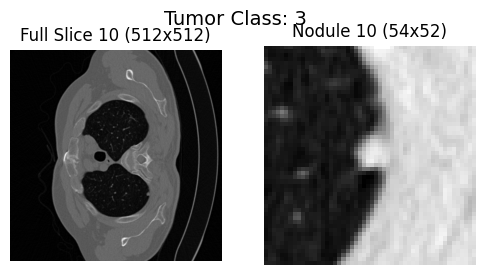

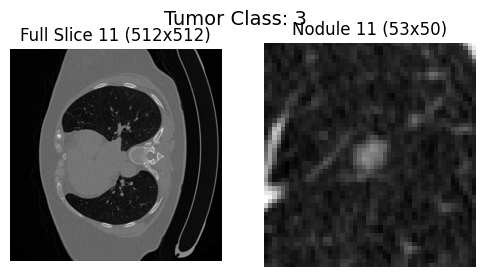

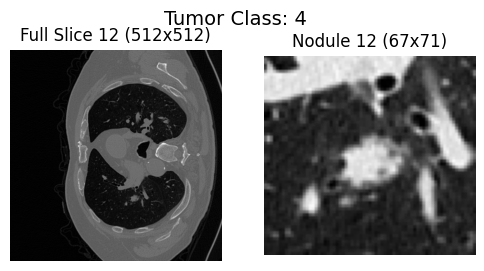

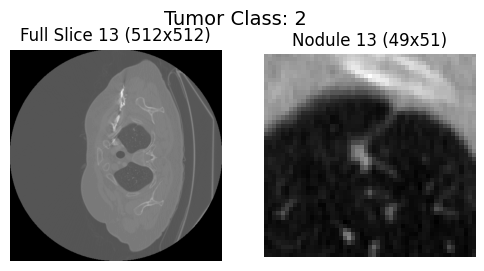

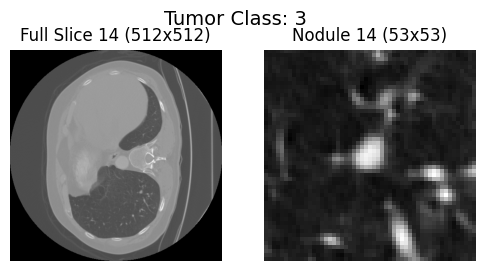

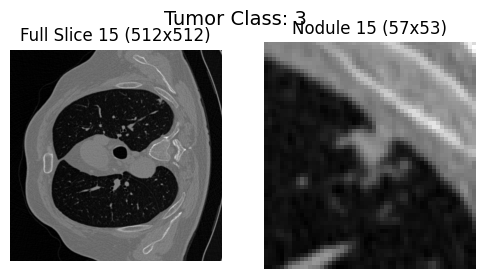

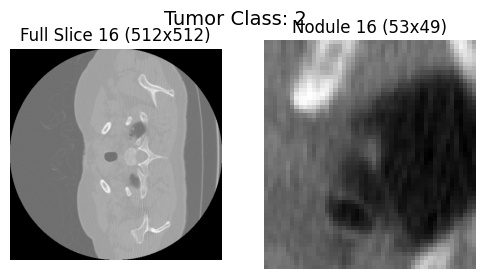

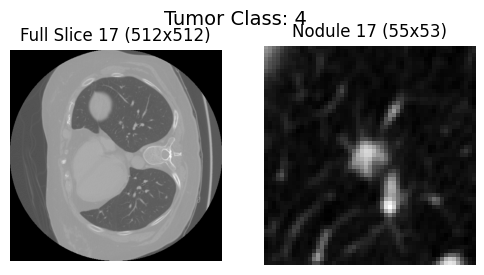

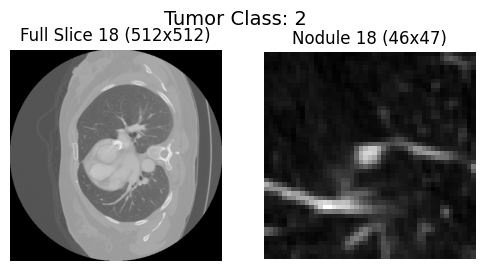

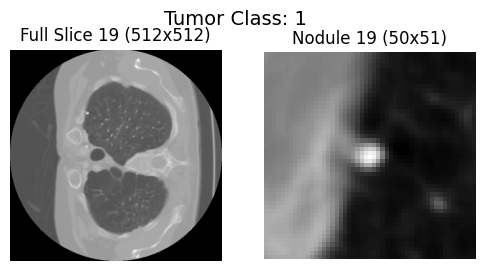

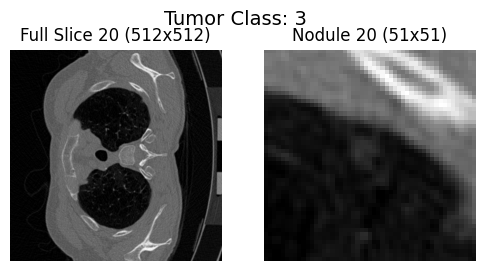

In [10]:
image_dir = "/kaggle/input/lung-tumor-ds/Train"

random_samples = dataset.sample(20)

for i, (_, row) in enumerate(random_samples.iterrows()):
    full_slice_path = os.path.join(image_dir, row['Full_slice'])
    nodule_path = os.path.join(image_dir, row['Nodule'])

    # Load the images
    full_slice = load_nrrd(full_slice_path)
    nodule = load_nrrd(nodule_path)

    # Visualize the images
    if full_slice is not None and nodule is not None:
        plt.figure(figsize=(6, 3))

        # Check dimensions and handle appropriately for full_slice
        full_slice_2d = full_slice[0] if len(full_slice.shape) > 2 else full_slice
        plt.subplot(1, 2, 1)
        plt.imshow(full_slice_2d, cmap="gray")
        plt.title(f"Full Slice {i+1} ({full_slice_2d.shape[0]}x{full_slice_2d.shape[1]})")
        plt.axis("off")

        # Check dimensions and handle appropriately for nodule
        nodule_2d = nodule[0] if len(nodule.shape) > 2 else nodule
        plt.subplot(1, 2, 2)
        plt.imshow(nodule_2d, cmap="gray")
        plt.title(f"Nodule {i+1} ({nodule_2d.shape[0]}x{nodule_2d.shape[1]})")
        plt.axis("off")

        plt.suptitle(f"Tumor Class: {row['TumorClass']}", fontsize=14)
        plt.show()

In [8]:
print("\nBasic Statistics for Tumor Classes:")
print(dataset['TumorClass'].describe())

full_slice_means = []
nodule_means = []

for _, row in dataset.iterrows():
    full_slice = load_nrrd(os.path.join(image_dir, row['Full_slice']))
    nodule = load_nrrd(os.path.join(image_dir, row['Nodule']))

    if full_slice is not None:
        full_slice_means.append(np.mean(full_slice))
    if nodule is not None:
        nodule_means.append(np.mean(nodule))

print("\nMean Intensities:")
print(f"Full Slice: Mean={np.mean(full_slice_means):.2f}, Std={np.std(full_slice_means):.2f}")
print(f"Nodule: Mean={np.mean(nodule_means):.2f}, Std={np.std(nodule_means):.2f}")


Basic Statistics for Tumor Classes:
count    2363.000000
mean        2.905628
std         1.015951
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: TumorClass, dtype: float64

Mean Intensities:
Full Slice: Mean=-783.50, Std=207.77
Nodule: Mean=-591.19, Std=184.99


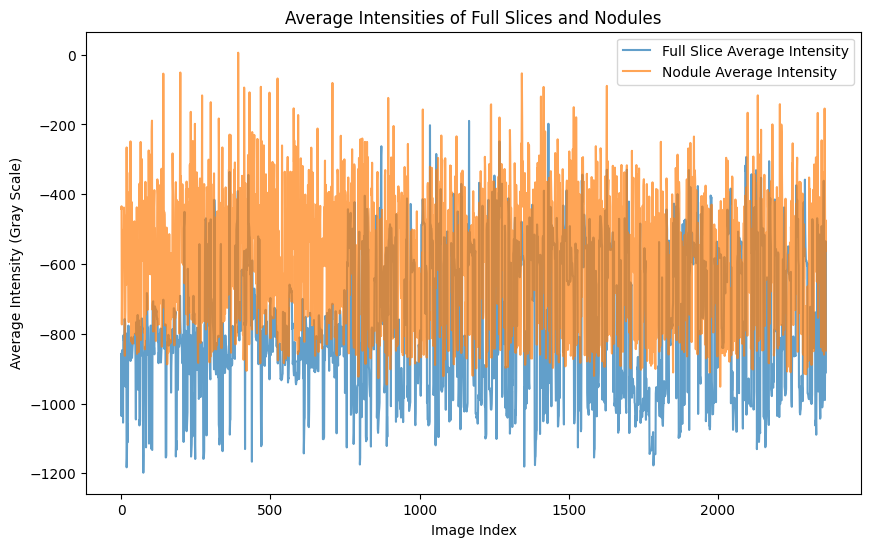


Mean Intensities:
Full Slice: Mean=-783.50, Std=207.77
Nodule: Mean=-591.19, Std=184.99


In [9]:
plt.figure(figsize=(10, 6))
plt.plot(full_slice_means, label='Full Slice Average Intensity', alpha=0.7)
plt.plot(nodule_means, label='Nodule Average Intensity', alpha=0.7)
plt.xlabel('Image Index')
plt.ylabel('Average Intensity (Gray Scale)')
plt.title('Average Intensities of Full Slices and Nodules')
plt.legend()
plt.show()

print("\nMean Intensities:")
print(f"Full Slice: Mean={np.mean(full_slice_means):.2f}, Std={np.std(full_slice_means):.2f}")
print(f"Nodule: Mean={np.mean(nodule_means):.2f}, Std={np.std(nodule_means):.2f}")